<a href="https://colab.research.google.com/github/adewale-codes/computer_vision_practice/blob/main/Template_Matching_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Image Processing with Python — Template Matching with Scikit-Image

How to identify similar objects in your image

Template matching is a useful technique for identifying objects of interest in a picture. Unlike similar methods of object identification such as image masking and blob detection. Template matching is helpful as it allows us to identify more complex figures.

In [26]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage.feature import peak_local_max

<ipython-input-27-5df5fbdc6de6>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(leuven);


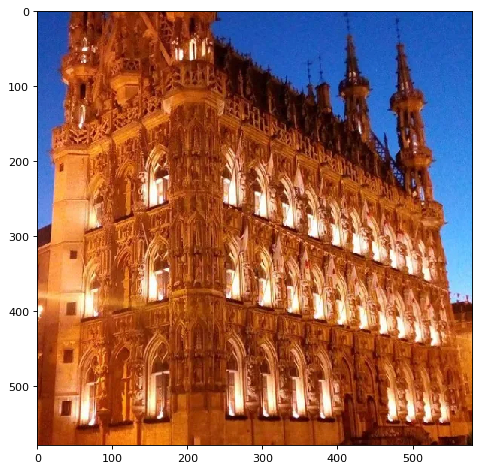

In [27]:
leuven = imread('leuven_picture.jpg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(leuven);

<ipython-input-28-14086657672a>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(leuven_gray);


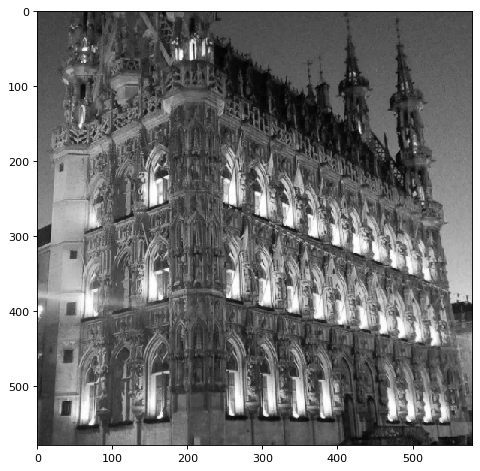

In [28]:
leuven_gray = rgb2gray(leuven)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(leuven_gray);

<ipython-input-29-1a99af02b87e>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(template);


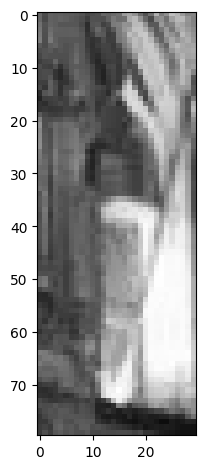

In [29]:
template = leuven_gray[310:390,240:270]
imshow(template);
#output=A Slice of Leuven

At this point we can feed the template into the match_template function of Skimage.

<ipython-input-30-2ab703d1ce52>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(resulting_image, cmap='magma');


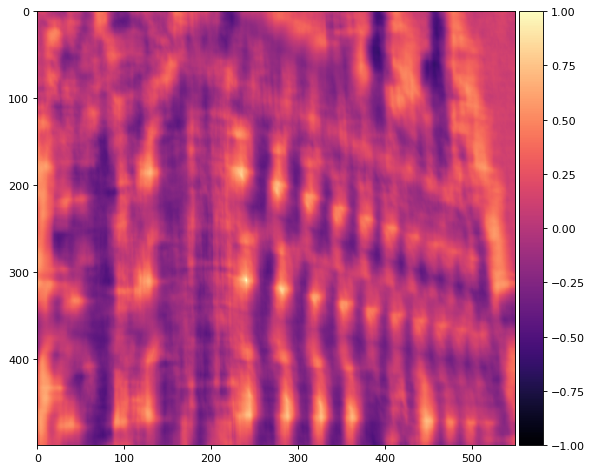

In [30]:
resulting_image = match_template(leuven_gray, template)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(resulting_image, cmap='magma');
#output=Resulting Image from the function

The above is the result of using the match_template function. Put very simply, the brighter the section of the image, the closer of a match it is to the template. Let us see which section of the image the function thinks is the closest match to the template.

<ipython-input-31-9bc82f4b5224>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(leuven_gray);


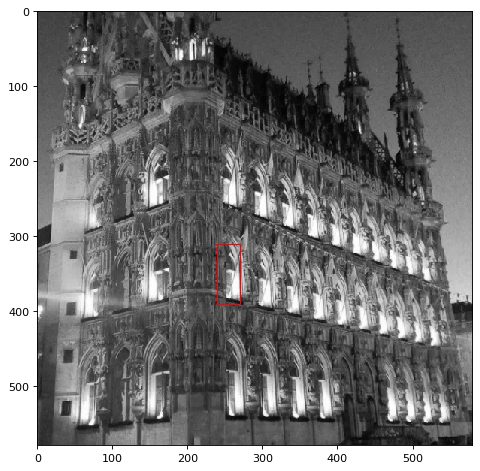

In [31]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template.shape
rect = plt.Rectangle((y, x), template_height, template_width,
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.gca().add_patch(rect)
imshow(leuven_gray);
#output=Best Match Identification

We can see that the image was able to correctly identify the perfect match for the template (to validate you can check with the slicing coordinates we used). This will definitely be useful in any task that would require you to search for an exact match of an object within an image.

Let us now see if we can get the function to identify the other windows as being more or less similar to our template.

<ipython-input-32-815b1588040b>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(leuven_gray);


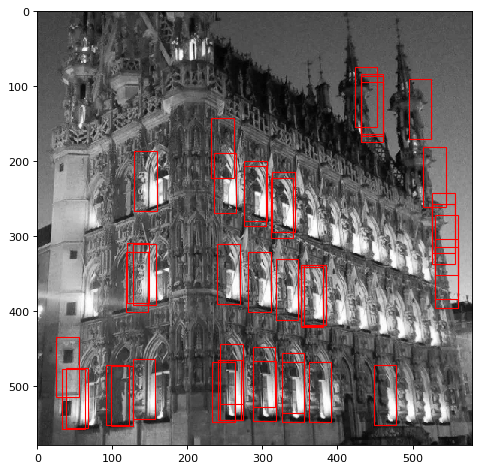

In [32]:
template_width, template_height = template.shape
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(resulting_image, threshold_abs=0.5,
                           exclude_border = 20):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
imshow(leuven_gray);
#output=Multiple Template Matches

We see that though the function does accurately identify several other windows. It also erroneously identifies several other objects that are clearly not windows. Let us see if we can cut down on the amount of false positives.

One way we can can remedy this is by making use of use of the homography matrix.Generally it warps the image and make it seem as if the image had been taken from another angle.

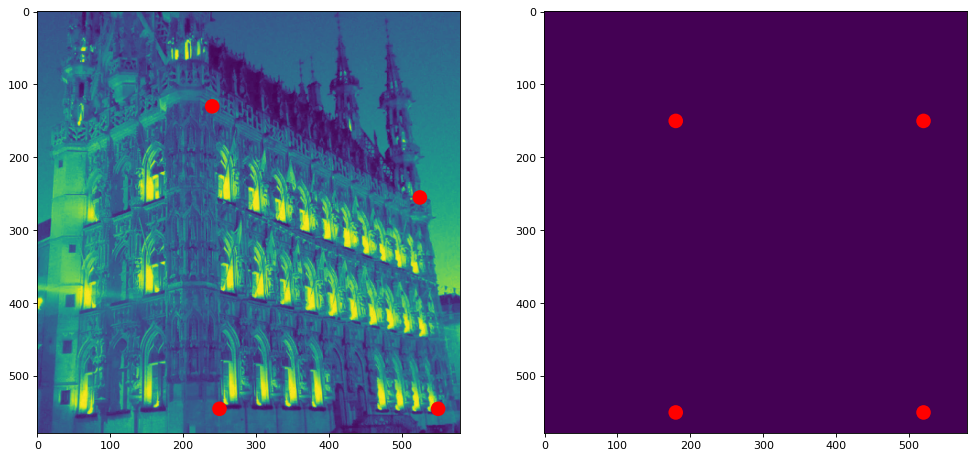

In [33]:
points_of_interest =[[240, 130],
                     [525, 255],
                     [550, 545],
                     [250, 545]]
projection = [[180, 150],
              [520, 150],
              [520, 550],
              [180, 550]]
color = 'red'
patches = []
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
for coordinates in (points_of_interest + projection):
    patch = Circle((coordinates[0],coordinates[1]), 10,
                    facecolor = color)
    patches.append(patch)
for p in patches[:4]:
    ax[0].add_patch(p)
ax[0].imshow(leuven_gray);
for p in patches[4:]:
    ax[1].add_patch(p)
ax[1].imshow(np.ones((leuven_gray.shape[0], leuven_gray.shape[1])));
#output image=Original Corners vs Target Corners

<Figure size 640x480 with 0 Axes>

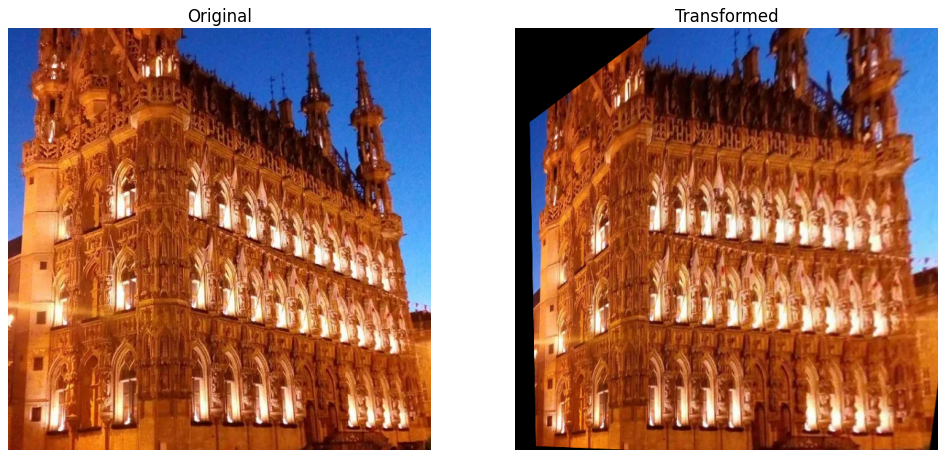

In [34]:
points_of_interest = np.array(points_of_interest)
projection = np.array(projection)
tform = transform.estimate_transform('projective', points_of_interest, projection)
tf_img_warp = transform.warp(leuven, tform.inverse)
plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(leuven)
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
ax[1].set_axis_off();
#Transformed Image

We can see that the image now faces forward. As we have mitigated the effect the angle has on template matching, let us see if we get better results. As before, let us first convert the image into grayscale and then apply the transform function.

<Figure size 640x480 with 0 Axes>

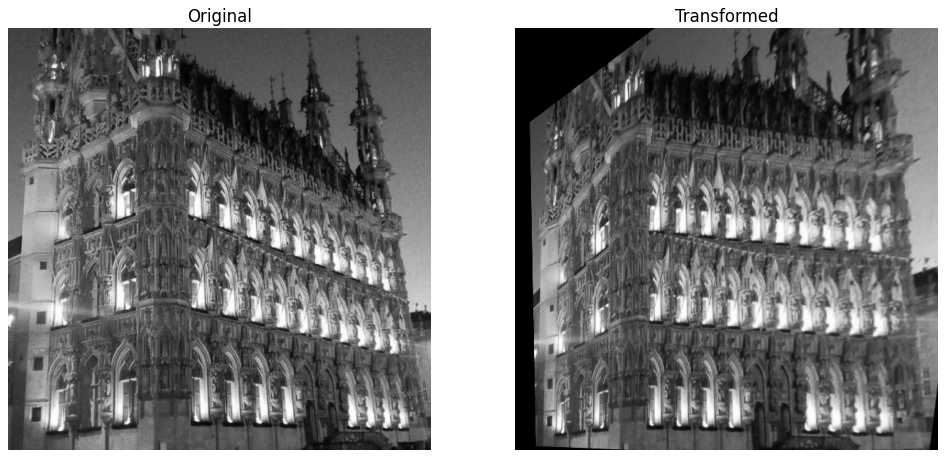

In [35]:
points_of_interest = np.array(points_of_interest)
projection = np.array(projection)
tform = transform.estimate_transform('projective', points_of_interest, projection)
tf_img_warp = transform.warp(leuven_gray, tform.inverse)
plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(leuven_gray, cmap = 'gray')
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp, cmap = 'gray')
ax[1].set_axis_off();

<ipython-input-36-75afdabeb135>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(result, cmap='magma');


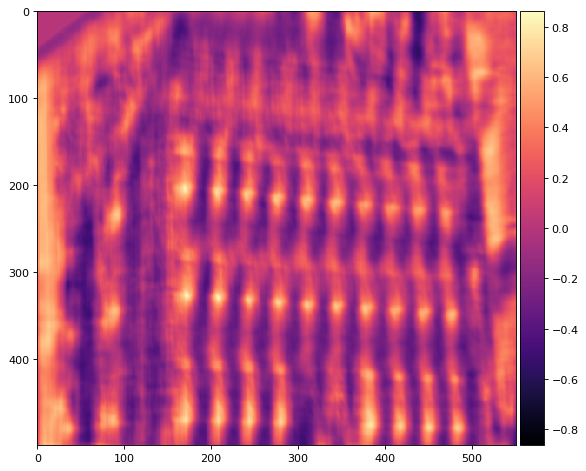

In [36]:
result = match_template(tf_img_warp, template)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(result, cmap='magma');

Now let us apply the exact same codes as before and see if we get better results.

<ipython-input-37-07bba64a8dfc>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(tf_img_warp);


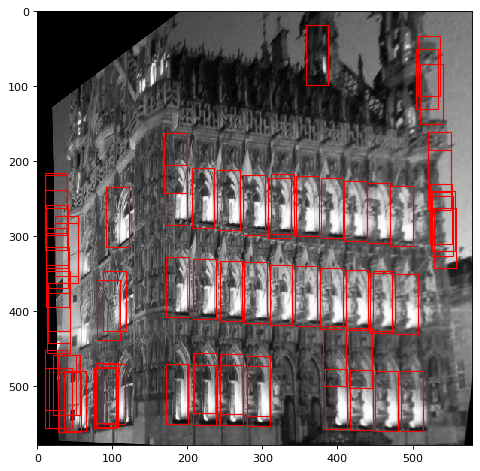

In [37]:
template_width, template_height = template.shape
plt.figure(num=None, figsize=(8, 6), dpi=80)
for x, y in peak_local_max(result, threshold_abs=0.5,
                           exclude_border = 10):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
imshow(tf_img_warp);

We can see that the algorithm can still identify every window on the image, however it still has those pesky false positives. To alleviate this, let us apply a filter the template matches. Below are some codes to do our data wrangling, apologies if they are slightly abtruse.

In [38]:

summed_diff = ...
filtered_list_mean = ...
filtered_list_median = ...
filtered_list_75 = ...

The above code should filter the matches by the mean difference, the median difference, and the 75% percentile difference. Essentially it will only hold matches that have absolute differences below those thresholds. The final step is to plot these out and see if the results have improved.

In [39]:
import numpy as np
from skimage.feature import peak_local_max
from matplotlib.patches import Rectangle


def calculate_diff(template, image, x, y):
  template_width, template_height = template.shape
  region = image[x:x + template_width, y:y + template_height]
  diff = np.abs(template - region)
  summed_diff = np.sum(diff)  # Calculate the total difference
  return summed_diff

template_width, template_height = template.shape
# Get coordinates of local maxima in the resulting image
coordinates = peak_local_max(result, threshold_abs=0.5, exclude_border=10)

# Calculate differences for each potential match
diffs = [
    (coord, calculate_diff(template, tf_img_warp, coord[0], coord[1]))
    for coord in coordinates
]

# Filter matches based on mean, median, and 75th percentile of differences
mean_diff = np.mean([diff[1] for diff in diffs])
median_diff = np.median([diff[1] for diff in diffs])
percentile_75_diff = np.percentile([diff[1] for diff in diffs], 75)

filtered_list_mean = [diff for diff in diffs if diff[1] < mean_diff]
filtered_list_median = [diff for diff in diffs if diff[1] < median_diff]
filtered_list_75 = [diff for diff in diffs if diff[1] < percentile_75_diff]

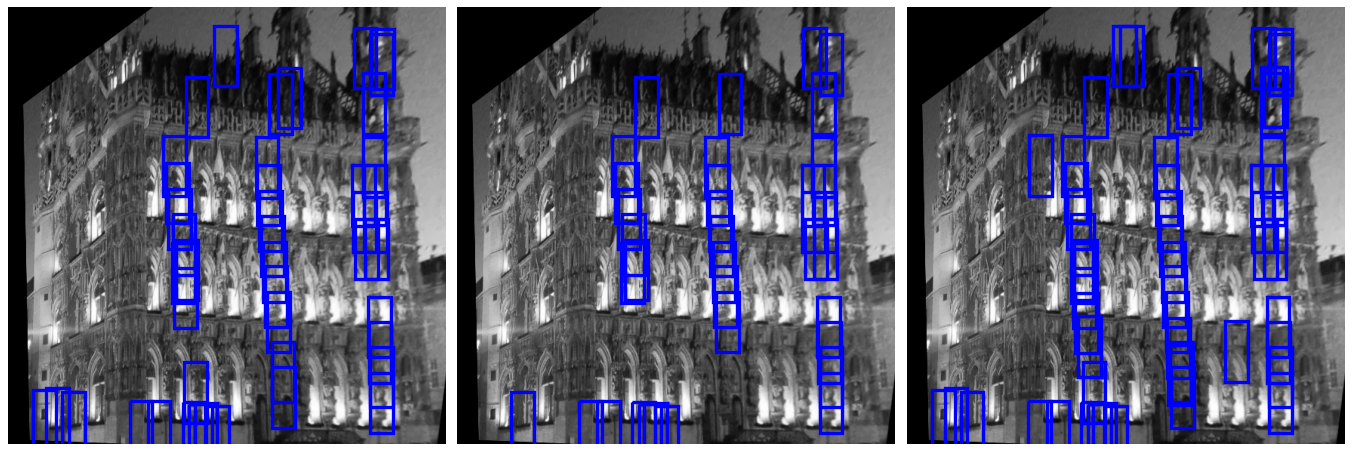

In [44]:
fig, ax = plt.subplots(1,3, figsize=(17, 10), dpi = 80)
template_width, template_height = template.shape
for box in filtered_list_mean:
    # Accessing the coordinates directly from the tuple 'box'
    patch = Rectangle((box[0][0], box[0][1]), template_height,
                       template_width, edgecolor='b',
                       facecolor='none', linewidth = 3.0)
    ax[0].add_patch(patch)
ax[0].imshow(tf_img_warp, cmap = 'gray');
ax[0].set_axis_off()
for box in filtered_list_median:
    # Accessing the coordinates directly from the tuple 'box'
    patch = Rectangle((box[0][0], box[0][1]), template_height,
                       template_width, edgecolor='b',
                       facecolor='none', linewidth = 3.0)
    ax[1].add_patch(patch)
ax[1].imshow(tf_img_warp, cmap = 'gray');
ax[1].set_axis_off()
for box in filtered_list_75:
    # Accessing the coordinates directly from the tuple 'box'
    patch = Rectangle((box[0][0], box[0][1]), template_height,
                       template_width,
                       edgecolor='b', facecolor='none',
                       linewidth = 3.0)
    ax[2].add_patch(patch)
ax[2].imshow(tf_img_warp, cmap = 'gray');
ax[2].set_axis_off()
fig.tight_layout()

We can see that all of them do look much better than the original image. However, we notice that though Mean and Median have far less false positives they also have far less true positives. The 75 Perc filter however is able to retain almost all the true positives.